<a href="https://colab.research.google.com/github/andydarmawan1/Activity-Lifecycle-dan-Layout/blob/master/session%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estimasi Nilai π dengan Monte Carlo Simulation

Estimasi nilai π: 3.13896


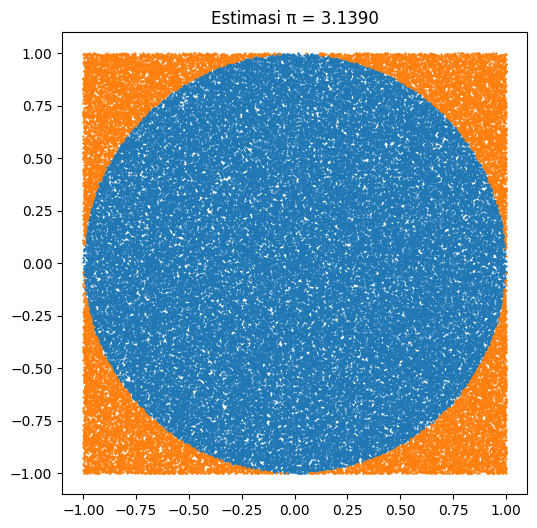

In [ ]:

import numpy as np
import matplotlib.pyplot as plt # menampilkan visualisasi

# Simulasi
n_points = 100000 # jumlah titik
x = np.random.uniform(-1, 1, n_points)
y = np.random.uniform(-1, 1, n_points)

# Titik dalam lingkaran
inside = x**2 + y**2 <= 1  #mengecek apakah titik (x,y) berada didalam lingkaran berjari-jari. (X pangkat 2 + Y pangkat 2 = 1)
pi_estimate = 4 * np.sum(inside) / n_points #Rasio titik didalam lingkuran / menghitung estimasi phi

print("Estimasi nilai π:", pi_estimate)

# Visualisasi
plt.figure(figsize=(6,6))
plt.scatter(x[inside], y[inside], s=0.5, label='Inside Circle') #biru
plt.scatter(x[~inside], y[~inside], s=0.5, label='Outside Circle') #orange
plt.title(f"Estimasi π = {pi_estimate:.4f}")
plt.legend() #Memberikan keterangan warna gambar
plt.show() # Menampilkan gambarnya


# Rounding Error & Floating Point

In [ ]:
import numpy as np

# Perhitungan biasa
a = 123.456
b = 123.455
hasil1 = a - b

# Perhitungan dengan pembulatan float
a_float = np.float32(a)
b_float = np.float32(b)
hasil2 = a_float - b_float

print("Hasil tanpa pembulatan:", hasil1)
print("Hasil dengan float32:", hasil2)


Hasil tanpa pembulatan: 0.0010000000000047748
Hasil dengan float32: 0.0009994507


# Newton's Method untuk Akar Kuadrat

In [ ]:
def newton_sqrt(x, max_iter=10, tol=1e-10): #1e = 0.0000000001
    guess = x / 2.0  #misal x = 25, tebakan awalnya = 25 / 2 = 12.5
    for i in range(max_iter):
        prev = guess
        guess = (guess + x / guess) / 2.0. #(tebakan_lama + (x / tebakan_lama)) /2
        if abs(prev - guess) < tol: #mengecek akurasi 5.0000000001 #5.0000000000
            break
    return guess

x = 25
hasil = newton_sqrt(x)
print(f"Akar kuadrat dari {x} adalah: {hasil}")

Akar kuadrat dari 25 adalah: 5.0


# Case 1: Smoothing (Kernel & Local Regression)

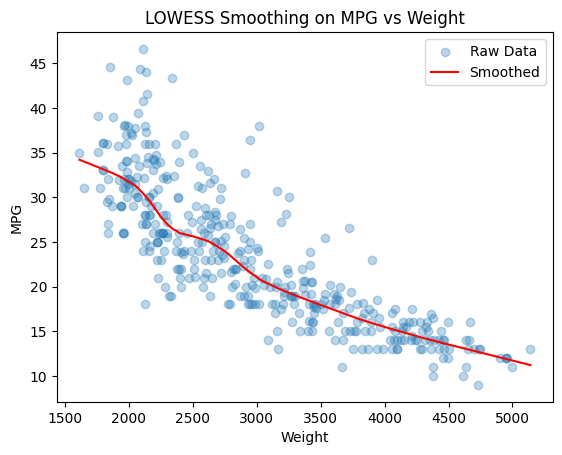

In [31]:
# Import library yang diperlukan
import pandas as pd  # Untuk manipulasi data
import seaborn as sns  # Untuk visualisasi data dan dataset contoh
import matplotlib.pyplot as plt  # Untuk plotting grafik
from statsmodels.nonparametric.smoothers_lowess import lowess  # Untuk metode smoothing LOWESS
import numpy as np  # Untuk operasi numerik

# Memuat dataset 'mpg' dari seaborn dan menghapus baris dengan nilai kosong
# Dataset 'mpg' berisi informasi tentang konsumsi bahan bakar berbagai mobil
df = sns.load_dataset("mpg").dropna()

# Menyiapkan data untuk smoothing
x = df['weight']  # Variabel independen: berat kendaraan
y = df['mpg']  # Variabel dependen: miles per gallon (efisiensi bahan bakar)

# Melakukan smoothing dengan metode LOWESS
# Parameter frac=0.3 berarti menggunakan 30% data terdekat untuk smoothing setiap titik
# Hasilnya berupa array 2D dengan kolom 0: nilai x, kolom 1: nilai y yang sudah di-smooth
smoothed = lowess(y, x, frac=0.3)

# Membuat plot visualisasi
plt.scatter(x, y, alpha=0.3, label="Raw Data")  # Plot data mentah dengan transparansi 30%
plt.plot(smoothed[:, 0], smoothed[:, 1], color='red', label="Smoothed")  # Plot hasil smoothing
plt.xlabel("Weight")  # Label sumbu x: berat kendaraan
plt.ylabel("MPG")  # Label sumbu y: efisiensi bahan bakar
plt.title("LOWESS Smoothing on MPG vs Weight")  # Judul plot
plt.legend()  # Menampilkan legenda untuk membedakan data mentah dan hasil smoothing
plt.show()  # Menampilkan plot

# Case 2: Robust Statistics (Outlier Detection & Robust Regression)

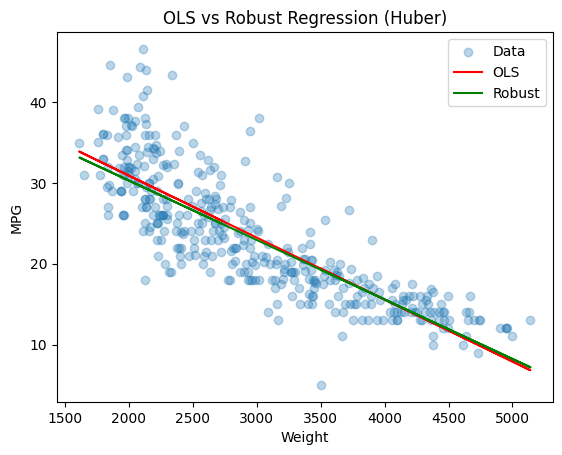

In [32]:
# Import library statsmodels untuk analisis statistik dan pemodelan
import statsmodels.api as sm

# Membuat salinan dataframe df ke df2 untuk mempertahankan data asli
df2 = df.copy()
# Menambahkan outlier dengan sengaja mengubah nilai 'mpg' di baris pertama menjadi 5
df2.loc[0, 'mpg'] = 5  # sengaja rusak

# Menyiapkan variabel independen (weight) dan menambahkan konstanta (intercept)
x = sm.add_constant(df2['weight'])
# Variabel dependen (mpg)
y = df2['mpg']

# Membuat model Ordinary Least Squares (OLS) regresi linear biasa
ols_model = sm.OLS(y, x).fit()
# Membuat model Robust Regression menggunakan HuberT norm untuk mengurangi pengaruh outlier
robust_model = sm.RLM(y, x, M=sm.robust.norms.HuberT()).fit()

# Plot scatter data asli
plt.scatter(df2['weight'], df2['mpg'], alpha=0.3, label="Data")
# Plot garis hasil prediksi model OLS (warna merah)
plt.plot(df2['weight'], ols_model.predict(x), label="OLS", color='red')
# Plot garis hasil prediksi model Robust (warna hijau)
plt.plot(df2['weight'], robust_model.predict(x), label="Robust", color='green')

# Menambahkan label sumbu dan judul plot
plt.xlabel("Weight")
plt.ylabel("MPG")
plt.title("OLS vs Robust Regression (Huber)")

# Menampilkan legenda untuk membedakan garis OLS dan Robust
plt.legend()
# Menampilkan plot
plt.show()

# Approximate Bayesian Computation (ABC)

/tmp/ipython-input-2331877050.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


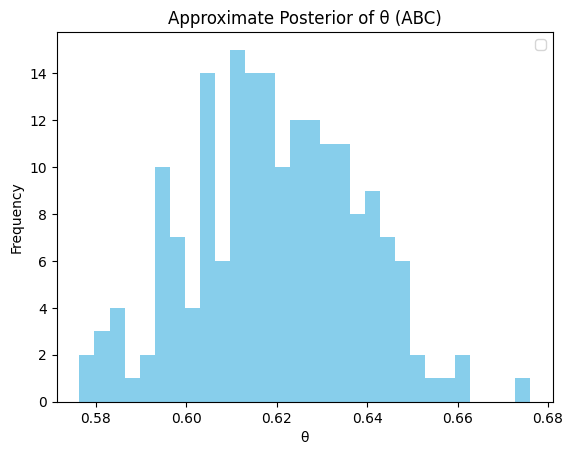

In [33]:
# Import library yang diperlukan
import numpy as np  # Untuk operasi numerik dan pembangkitan data acak
import matplotlib.pyplot as plt  # Untuk visualisasi data

# Bagian 1: Membangkitkan data observasi (data nyata yang ingin kita modelkan)
np.random.seed(42)  # Menetapkan seed untuk reproduktibilitas hasil
obs_data = np.random.binomial(n=10, p=0.6, size=100)  # Membangkitkan 100 data binomial dengan n=10 dan p=0.6
obs_mean = np.mean(obs_data)  # Menghitung rata-rata dari data observasi

# Bagian 2: Approximate Bayesian Computation (ABC)
# ABC adalah metode untuk memperkirakan distribusi posterior tanpa perlu menghitung likelihood secara eksplisit

# Membangkitkan kandidat nilai theta (parameter probabilitas) dari distribusi uniform
theta_samples = np.random.uniform(0, 1, 10000)  # 10.000 sampel dari Uniform(0,1)
accepted = []  # List untuk menyimpan nilai theta yang diterima

# Proses simulasi ABC
for theta in theta_samples:
    # Membangkitkan data simulasi dengan parameter theta saat ini
    sim_data = np.random.binomial(n=10, p=theta, size=100)

    # Kriteria penerimaan: jika selisih mean data simulasi dan observasi < 0.1
    if abs(np.mean(sim_data) - obs_mean) < 0.1:
        accepted.append(theta)  # Simpan theta yang memenuhi kriteria

# Bagian 3: Visualisasi hasil
plt.hist(accepted, bins=30, color='skyblue')  # Membuat histogram dari theta yang diterima
plt.title("Approximate Posterior of θ (ABC)")  # Judul plot
plt.xlabel("θ")  # Label sumbu x
plt.ylabel("Frequency")  # Label sumbu y
plt.show()  # Menampilkan plot